# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 3 - 1

def df(z):
    return 3 * z**2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

## Plot of f(z)= z\*\*3-1 for the reals f(x)= x\*\*3-1

Text(0, 0.5, 'f(x)')

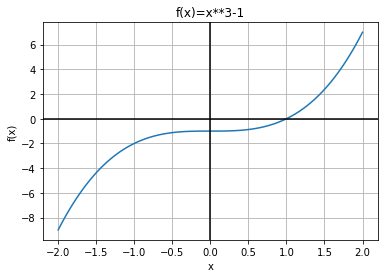

In [8]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x**3-1')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


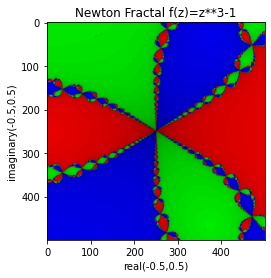

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


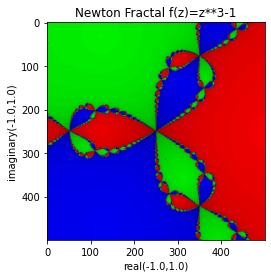

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


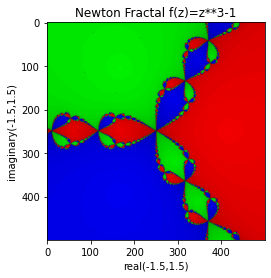

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


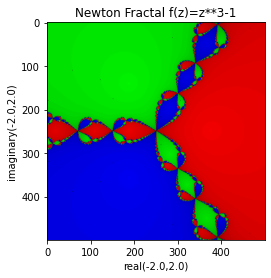

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


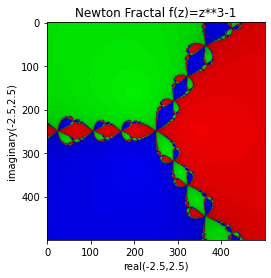

In [9]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


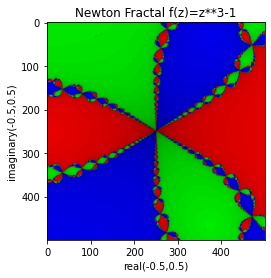

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


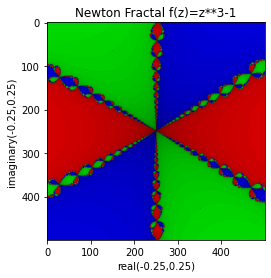

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


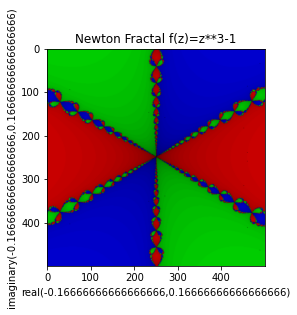

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


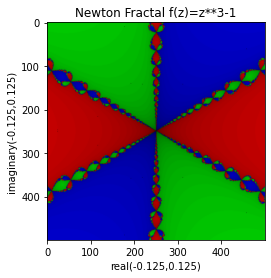

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


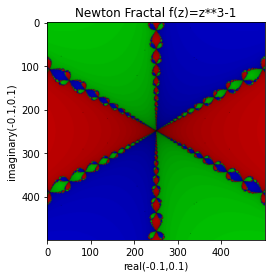

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


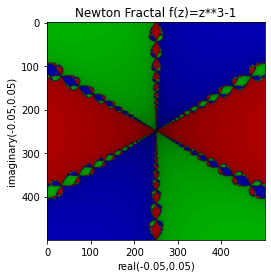

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


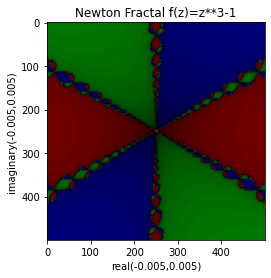

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


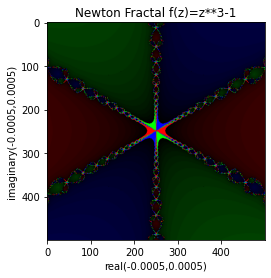

In [10]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

Newton iterates form z=10.0 + 0.0j

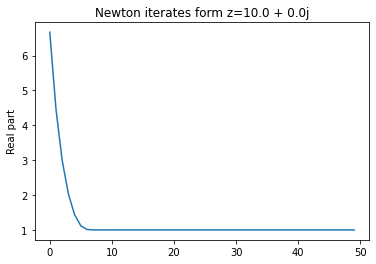

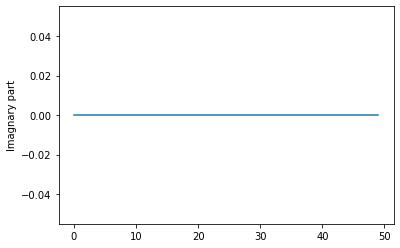

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Newton iterates form z=-10.0 + 10.0j

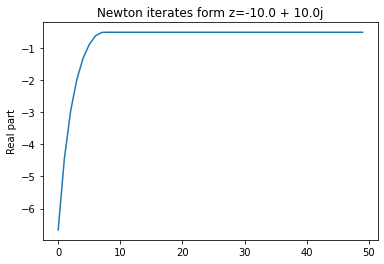

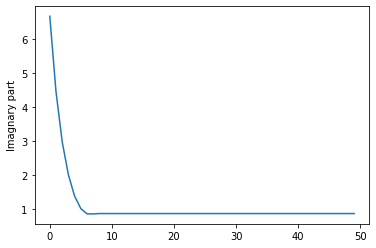

In [ ]:
z=-10.0 +10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Newton iterates form z=-10.0 -10.0j

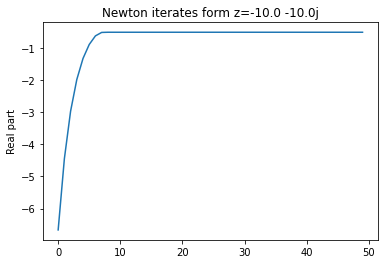

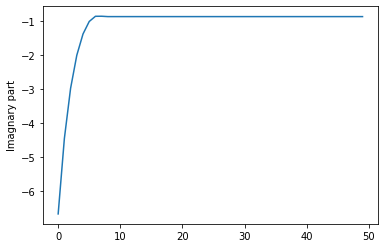

In [ ]:
z=-10.0 -10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Newton iterates form z=0.0 + 0.0j

In [ ]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

# f(z)=z^8+15z^4-16

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 8 + 15 * z**4 - 16

def df(z):
    return 8 * z**7 + 60 * z**3

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1
    r3 = complex('j')
    r4 = complex('-j')
    r5 = complex(math.sqrt(2), math.sqrt(2))
    r6 = complex(-math.sqrt(2), -math.sqrt(2))
    r7 = complex(-math.sqrt(2), math.sqrt(2))
    r8 =  complex(math.sqrt(2), -math.sqrt(2))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                    # color yellow
                    pixels[height-y-1,x] = (255,255 - count*multcol,30)
                elif abs(z-r5)<=eps:
                    # color orange
                    pixels[height-y-1,x] = (255,180 - count*multcol,50)
                elif abs(z-r6)<=eps:
                    # color aqua
                    pixels[height-y-1,x] = (0, 255- count*multcol, 255 - count*multcol)    
                elif abs(z-r7)<=eps:
                    # color gray
                    pixels[height-y-1,x] = (128, 128, 128 - count*multcol)
                elif abs(z-r8)<=eps:
                    # color purple
                    pixels[height-y-1,x] = (255, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)= z ** 8 + 15 z ** 4 - 16 ')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Plot of f(z)= z ** 8 + 15 z ** 4 - 16 for the reals f(x)= x ** 8+15x ** 4 - 16

Text(0, 0.5, 'f(x)')

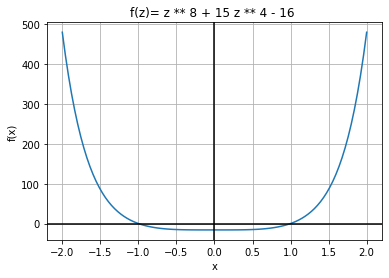

In [15]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z)= z ** 8 + 15 z ** 4 - 16 ')
plt.xlabel('x')
plt.ylabel('f(x)')


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


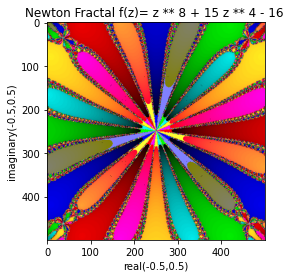

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


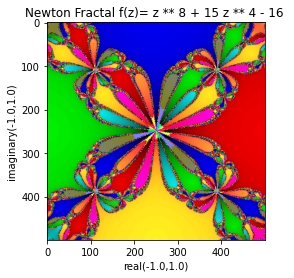

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


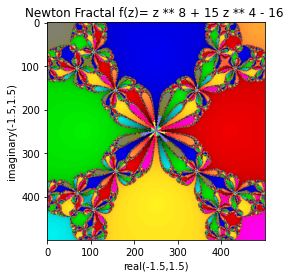

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


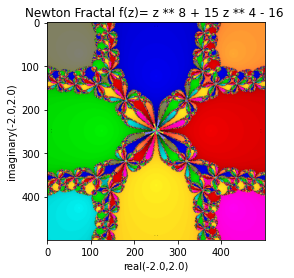

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


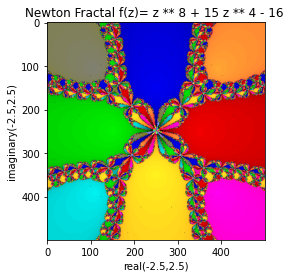

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


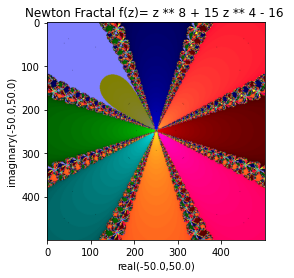

In [16]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=100)


zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


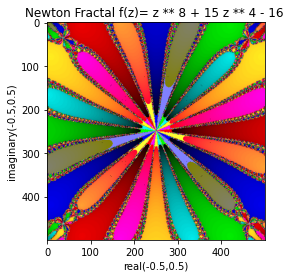

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


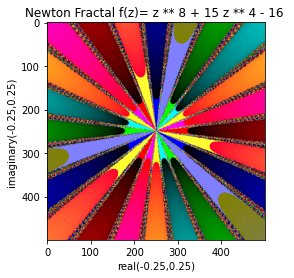

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


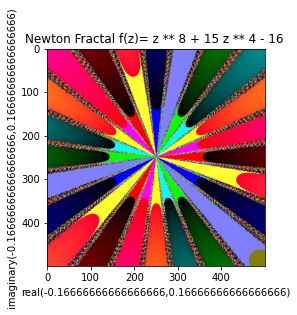

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


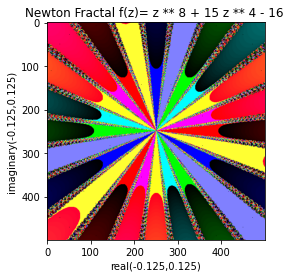

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


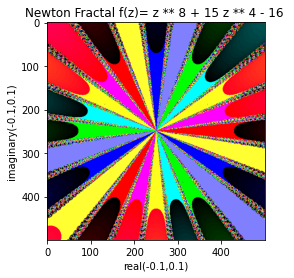

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


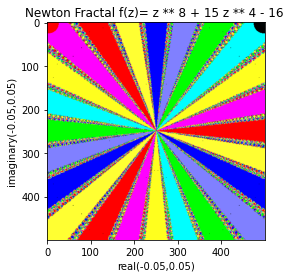

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


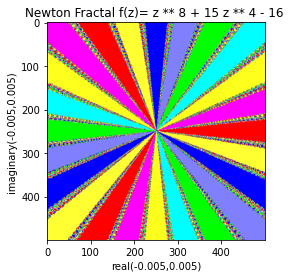

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


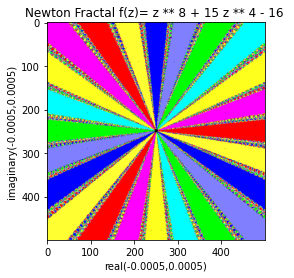

In [22]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Newton iterates form z=10.0 + 0.0j

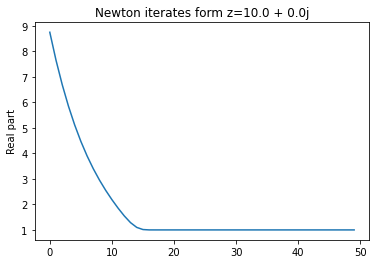

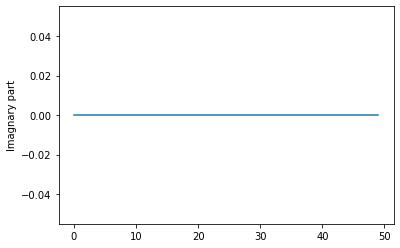

In [18]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j

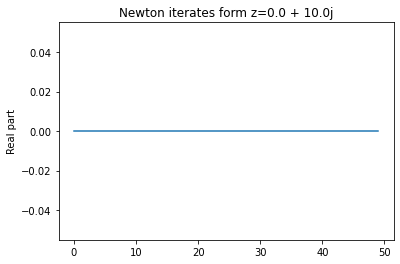

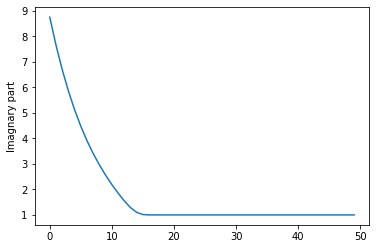

In [19]:
z=0.0 +10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 -10.0j

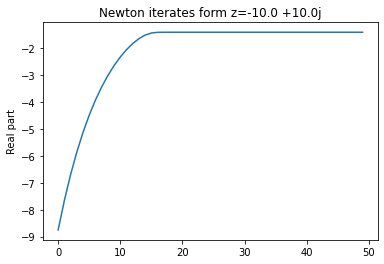

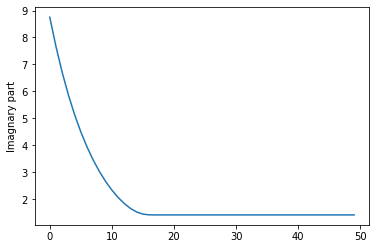

In [20]:
z=-10.0 +10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 +10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

In [21]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

## Analisis

La funcion f(z)=z^8+15z^4-16 tinene 8 raices, 6 complejas(z= j , -j , 1.41+1.414j , 1.41 + 1.414j , -1.41 - 1.414j , -1.41 + 1.414j , 1.41 - 1.414j ) y 2 reales (z= 1,-1). Tras aplicar el metodo de Newton-Raphson los puntos se colorean segun a que raiz convergan estos son  azul, amarillo, naranja, aguamarina, gris, purpura, rojo y verde, en oreden con las raices presentadas anteriormente , los puntos que divergen estan coloreados con negro. La rapidez con la que convergen los puntos es visualisable por su "tono" entre mas oscuro mas tiempo le tardo al punto en converger

Viendo los resultados de las 4 iteraciones hechas sobre 4 puntos podemos ver que: En z= 10+0j , donde solo esta la parte real, esta converge a 1. En z= 0+10j , donde solo esta la parte imaginaria, esta converge a j. En z= -10+10j ambas partes convergen, a la raiz z=-1.41 + 1.414j. El origen (0+0j) diverge.

Observando las ilustraciones es posible ver que el comportamiento de este fractal divide el plano igualmente de manera radial entre areas que convergen a una sola raiz siendo las lineas grupos de fractales, el numero en el que estas regiones, siempre multiplo de dos, varia de manera ciclica.

# f(z)=z^3-2z+2

In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 3 - 2*z + 2 

def df(z):
    return 3 * z ** 2 - 2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = -1.7693
    r2 = complex(0.88465,-0.58974)
    r3 = complex(0.88465,0.58974)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)= z ** 3 + 2 z + 2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Text(0, 0.5, 'f(z)')

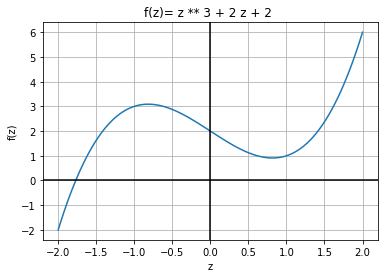

In [4]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z)= z ** 3 + 2 z + 2 ')
plt.xlabel('z')
plt.ylabel('f(z)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


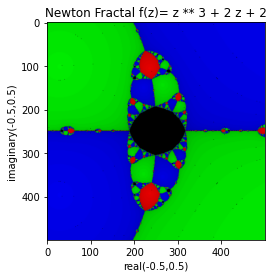

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


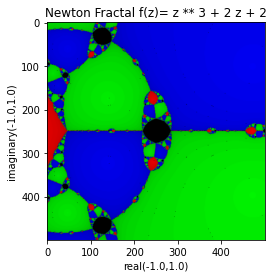

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


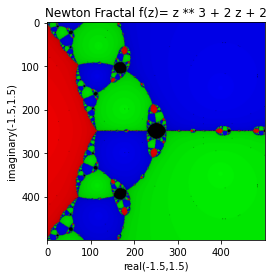

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


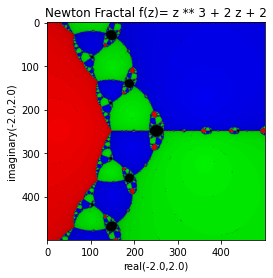

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


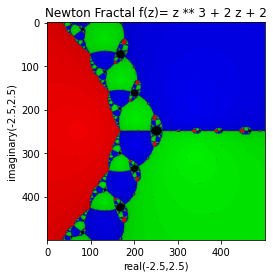

In [5]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


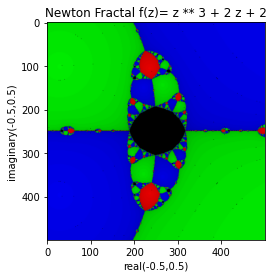

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


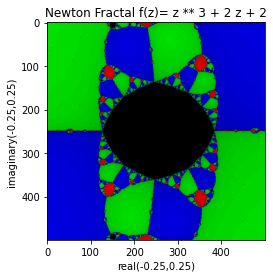

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


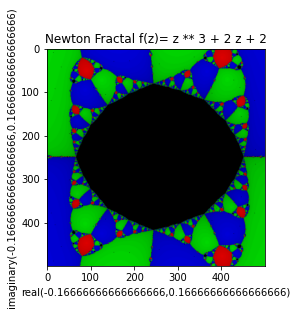

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


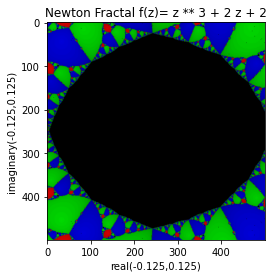

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


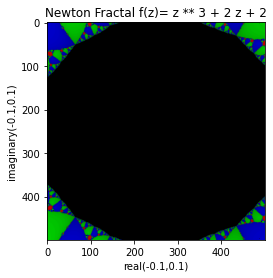

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


KeyboardInterrupt: ignored

In [6]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Newton iterates form z=10.0 + 0.0j

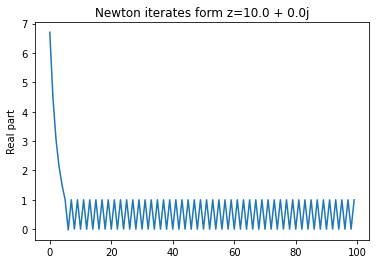

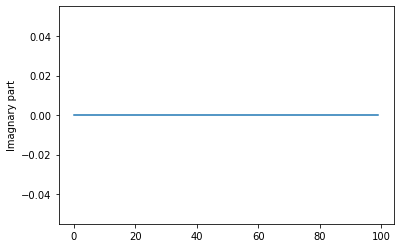

In [24]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

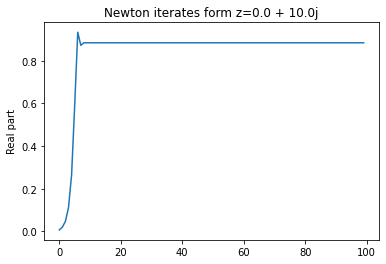

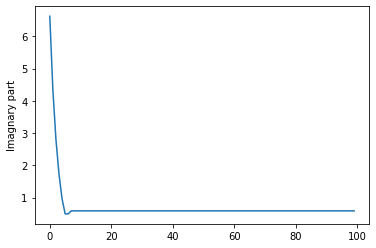

In [25]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j




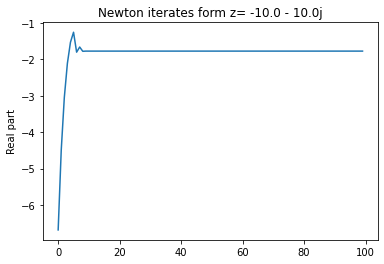

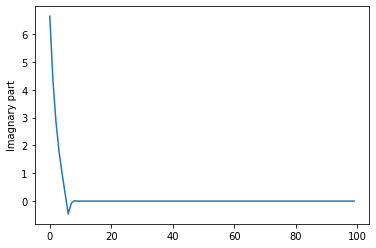

In [26]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

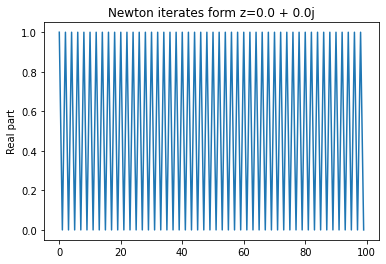

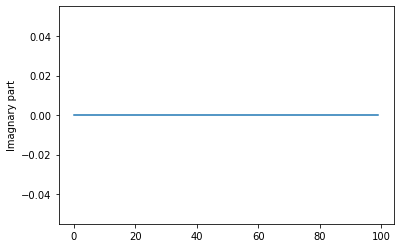

In [27]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Analisis

La funcion f(z)=z^3-2z+2 tinene 3 raices, 2 complejas(z≈0.88465 + 0.58974 j,z≈0.88465 - 0.58974 j) y una real (z≈-1.7693). Como se puede ver las ilustraciones los puntos que convergen a la raiz z≈0.88465 - 0.58974j estan coloreadas de azul, los que convergen a z≈0.88465 + 0.58974j estan coloreadas en verde, los que covergen a z≈-1.7693 estan marcados con rojo y los que divergen con negro.La rapidez con la que convergen los puntos es visualisable por su "tono" entre mas oscuro mas tiempo le tardo al punto en converger

Viendo los resultados de las 4 iteraciones hechas sobre 4 puntos podemos ver que: En z= 10+0j , donde solo esta la parte real, esta oscila de tal manera que diverge. En z= 0+10j , donde solo esta la parte imaginaria, ambas partes convergen a la raiz z≈0.88465 - 0.58974j. En z= -10-10j ambas partes convergen a la raiz z≈0.88465 - 0.58974j. En el punto 0+0j la parte real oscila de tal manera que diverge lo cual es contrastable con las ilustaciones.

Es posible decir, observando las ilustraciones que el plano de los complejos/reales esta partido en 3 partes en la diagonales positivo/negativa y negativa/negativa y el eje de los reales positivos, donde se generan los fractales. las areas en el medio de estas 3 lineas convergen solo a una raiz. tambien se presenta grandes areas, relativamente, que no convergen a ninguna raiz    

# f(z)=z^6+z^3-1

In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np
def f1(z):
    return z**6+z**3-1

def df1(z):
    return 6 * z**5 + 3 * z**2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """
    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)
    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    # Bounding roots
    a = -1 + 5**(1/2)
    b = -1 - 5**(1/2)
    c = 2**(2/3)
    d = 3**(1/2) 
    e = (a**(1/3))*c
    t = (b**(1/3))*c
    e1 = e*d
    t1 = t*d

    r1 = (a/2)**(1/3)
    r2 = (b/2)**(1/3)
    r3 = complex((-(e)/4),(e1/4))
    r4 = complex((-(e)/4),(-e1/4))
    r5 = complex((-(t)/4),(t1/4))
    r6 = complex((-(t)/4),(-t1/4))
    multcol = 5
    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df1(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext =  z - f1(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                    # color yellow
                    pixels[height-y-1,x] = (255,255 - count*multcol,30)
                elif abs(z-r5)<=eps:
                    # color orange
                    pixels[height-y-1,x] = (255,180 - count*multcol,50)
                elif abs(z-r6)<=eps:
                    # color grey
                    pixels[height-y-1,x] = (128, 128, 128 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Text(0, 0.5, 'f(z)')

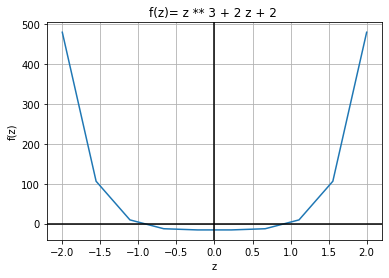

In [ ]:
x = np.linspace(-2.0,2.0,10)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z)= z ** 3 + 2 z + 2 ')
plt.xlabel('z')
plt.ylabel('f(z)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


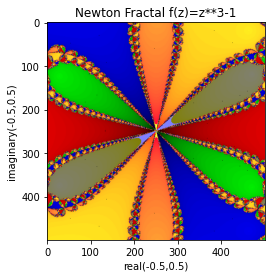

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


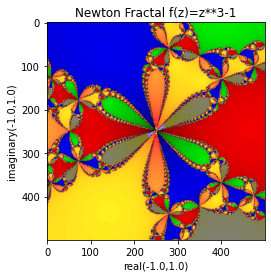

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


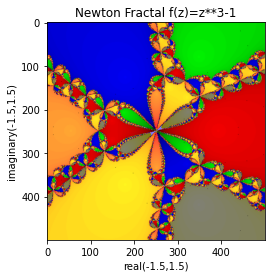

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


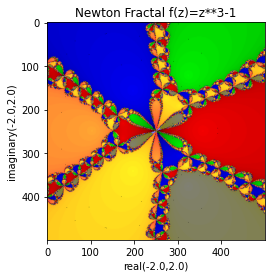

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


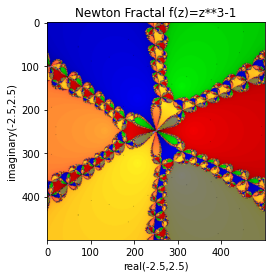

Z region from ( -50.0 , -50.0 ) to ( 50.0 , 50.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


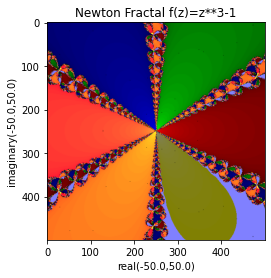

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=100)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


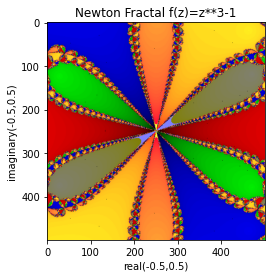

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


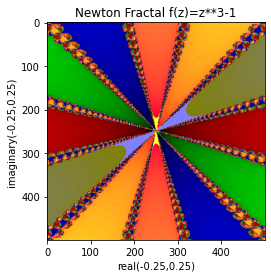

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


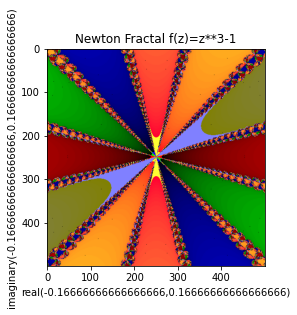

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


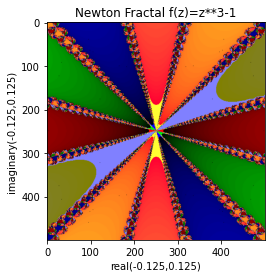

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


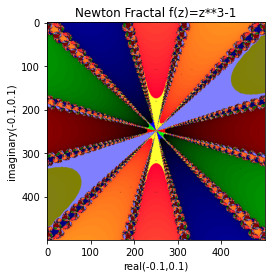

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


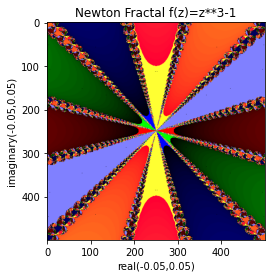

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


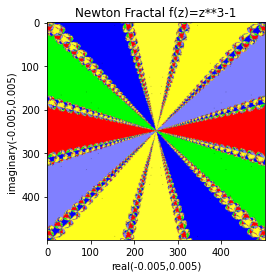

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


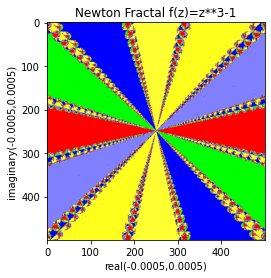

In [ ]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Newton iterates form z=-10.0 + 0.0j

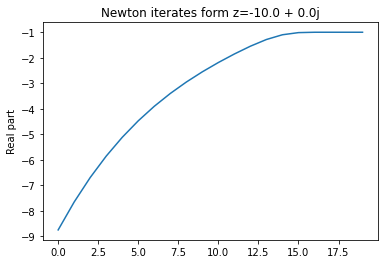

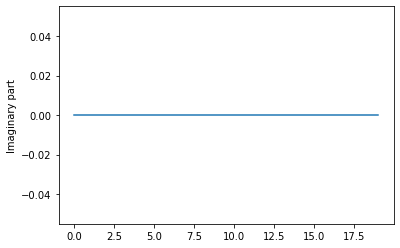

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(20):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

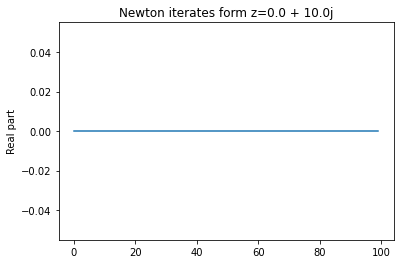

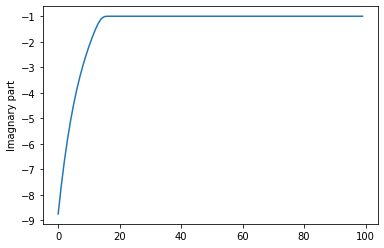

In [ ]:
z=0.0 - 10.0j
r=[]
i=[]
for k in range(100):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=10.0 - 10.0j

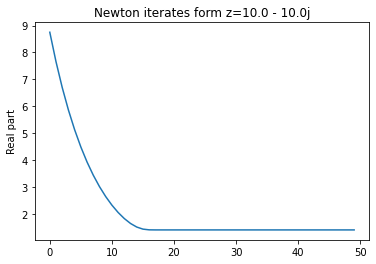

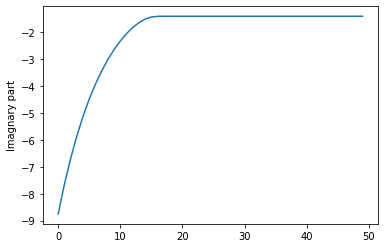

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [ ]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

## Analisis

La funcion f(z)=z^6+z^3-1 tinene 4 raices, 4 complejas(z= -0.425+0.737j , -0.425-0.737j , -1.173+1.110j , 0.586-1.016j , -1.414+1.414j , 1.414-1.414j) y 2 reales (z= 0.851, -1.173). Las ilustraciones colorean los puntos a las raices que convergen, los puntos que divergen estan coloreados con negro.La rapidez con la que convergen los puntos es visualisable por su "tono" entre mas oscuro mas tiempo le tardo al punto en converger.

Viendo los resultados de las 4 iteraciones hechas sobre 4 puntos podemos ver que: En z= -10+0j , donde solo esta la parte real, esta converge a la raiz z=0.851. En z= 0-10j , donde solo esta la parte imaginaria, esta converge a 1.414j pero la parte real sigue en 0, por lo que no se acerca a ninguna raiz. En z= 10-10j ambas partes convergen, a la raiz z=-1.414-1.414j. El origen (0+0j) diverge.

Observando las ilustraciones es posible observar que el plano de divide en 6 regiones, con 6 lineas de fractales que a su vesestan divididas en 6, estas regiones no necesariamente convergen a la misma raiz.  